<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/test/notebooks/k2sff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Not sure why 250001426 returns empty skyview though image is available in https://aladin.u-strasbg.fr/AladinLite/
* Not sure why first upper left corner panel is off from the grid

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@test#egg=chronos

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
#!pip install git+https://github.com/rodluger/k2plr.git

In [4]:
k2 = cr.K2sff(epicid=201663879, verbose=False)
k2.target_coord.icrs

Available campaigns: [14]
Using campaign=14.


<SkyCoord (ICRS): (ra, dec) in deg
    (166.801033, 3.040031)>

In [5]:
k2.k2sff_best_aper_mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

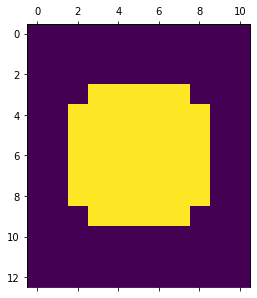

In [6]:
%matplotlib inline
import matplotlib.pyplot as pl

pl.matshow(k2.k2sff_best_aper_mask)

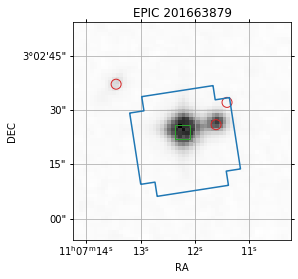

In [9]:
ax = k2.plot_gaia_sources_on_survey(survey="DSS2 Red") 

## grid

In [11]:
epics = """201663879,
201663913,
201796690,
245944983,
246074965,
246163416,
246313886,
246331347,
246331418,
246472939,
246909566,
248480671,
248558190,
248616368,
248639308,
248775938,
248782482,
249384674,
249391469,
249557502,
249826231,
250001426,
250099723,
247335861""".split(',')

In [ ]:
from pathlib import Path
import matplotlib.pyplot as pl
from astroquery.skyview import SkyView
from astropy.wcs import WCS
import astropy.units as u
import deepdish as dd 
from tqdm import tqdm

fig = pl.figure(figsize=(15,15), constrained_layout=True)

survey = "DSS2 Red"
fov_rad = 60*u.arcsec
    
for i,epic in tqdm(enumerate(epics)):
    try:
        k2 = cr.K2sff(epicid=int(epic), verbose=False)
        # fetch survey image hdu
        k2.hdu = SkyView.get_images(position=k2.target_coord, coordinates='icrs',
                                 survey=survey, radius=fov_rad, grid=False)[0][0]
        # create subplot with projection based on hdu image
        ax = fig.add_subplot(6,4,i+1, projection=WCS(k2.hdu.header))
        # plot
        ax2 = k2.plot_gaia_sources_on_survey(ax=ax, survey=survey, fov_rad=fov_rad)
        # cleanup axes
        r = ax2.coords['ra']
        d = ax2.coords['dec']
        r.set_ticks_visible(False)
        r.set_ticklabel_visible(False)
        d.set_ticks_visible(False)
        d.set_ticklabel_visible(False)
    except Exception as e:
        print(f"Error: {e}")
# fig.subplots_adjust(hspace=0)
# fig.subplots_adjust(wspace=0)

0it [00:00, ?it/s]

Available campaigns: [14]
Using campaign=14.


1it [00:10, 10.37s/it]

Available campaigns: [14]
Using campaign=14.
